Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Important:** This notebook was AI-generated and has not been fully verified.
Please be cautious when interpreting the code or results.

Overview of the Dandiset:

This Dandiset contains a pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

You can find the Dandiset here: https://dandiarchive.org/dandiset/001375

What this notebook will cover:

1.  Loading the Dandiset using the DANDI API
2.  Loading one of the NWB files in the Dandiset and showing some metadata
3.  Summarizing the contents of the NWB file
4.  Loading and visualizing some data from the NWB file
5.  Summarizing findings and providing possible future directions for analysis

Required packages:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nPrinting all assets:")
for asset in assets:
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

Printing all assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


Loading an NWB file and showing metadata:

In this section, we will load one of the NWB files in the Dandiset and show some metadata.

We will load the following file: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Timestamps reference time: {nwb.timestamps_reference_time}")
print(f"File create date: {nwb.file_create_date} - Note: This date appears to be in the future and may be a data anomaly.")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00
Timestamps reference time: 2024-07-25 19:00:00-07:00
File create date: [datetime.datetime(2025, 4, 5, 16, 50, 15, 663983, tzinfo=tzoffset(None, -25200))] - Note: This date appears to be in the future and may be a data anomaly.


You can also explore this NWB file on neurosift:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

Summarizing the contents of the NWB file:

The NWB file contains the following information:

*   Electrode Group Names: {[name for name in nwb.electrode_groups]}
*   Electrode Column Names: {nwb.electrodes.colnames}
*   Units Column Names: {nwb.units.colnames}
*   Trials Column Names: {nwb.trials.colnames}

Loading and visualizing some data from the NWB file:

In this section, we will load and visualize some data from the NWB file.

We will load the `time_series` data from the `acquisition` group and plot a small segment of the data.

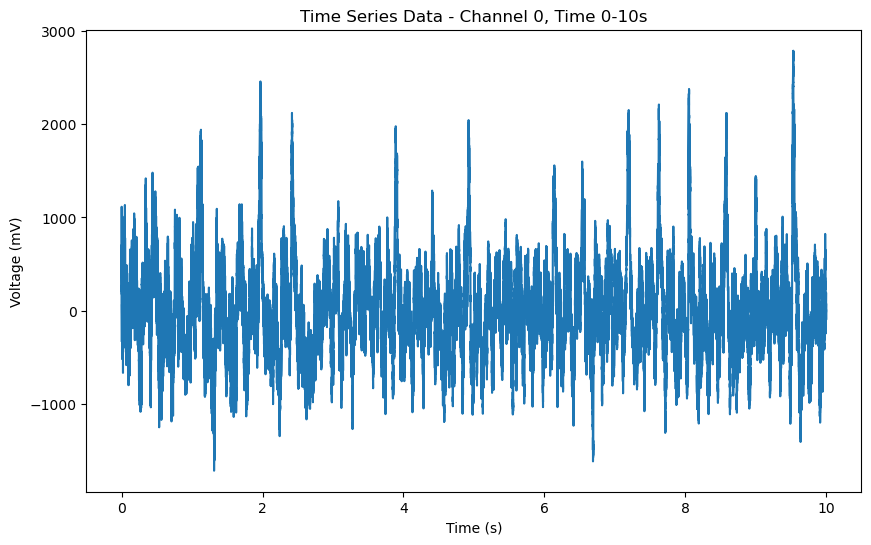

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Access the time_series data
if "time_series" in nwb.acquisition:
    time_series = nwb.acquisition["time_series"]
    data = time_series.data
    rate = time_series.rate
    units = time_series.unit

    # Select a small segment of data (e.g., first 10 second from channel 0)
    start_time = 0  # seconds
    end_time = 10  # seconds
    start_index = int(start_time * rate)
    end_index = int(end_time * rate)
    channel_index = 0

    segment_data = data[start_index:end_index, channel_index]
    time = np.linspace(start_time, end_time, len(segment_data))

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(time, segment_data)
    plt.xlabel("Time (s)")
    plt.ylabel(f"Voltage ({units})")
    plt.title(f"Time Series Data - Channel {channel_index}, Time {start_time}-{end_time}s")
    plt.show()
else:
    print("No time_series data found in nwb.acquisition")

Summarizing findings and providing possible future directions for analysis:

This notebook demonstrated how to load and explore a Dandiset related to GABA disruption experiments using the DANDI API.

We explored the time series data, which is likely to reflect changes in hippocampal and neocortical activity resulting from the septal GABA disruption.

Possible future directions for analysis:

*   Correlate changes in time series data with trial structure to examine task-related effects of GABA disruption.
*   Analyze the units table (if available) to explore how GABA disruption affects single neuron spiking activity.
*   Compare activity across different electrode groups to examine the spatial distribution of GABA disruption effects.